In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf

In [3]:
#filename = 'AAPL'
stock = pd.read_csv(r"C:\Users\karth\Downloads\Project_Finalyr\RELIANCE.NS.csv")
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509537,48051995.0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427811,77875009.0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506985,96602936.0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409932,100099436.0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338422,76935930.0


In [4]:
stock.shape

(6522, 7)

In [5]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6.504000e+03
mean,458.859794,464.607796,452.564438,458.325896,439.181946,3.008009e+07
std,533.712776,539.689633,526.903597,532.939318,532.885896,4.932459e+07
min,11.836550,11.890704,11.763055,11.890704,7.850866,0.000000e+00
25%,50.231842,51.059628,49.208717,50.258919,39.579466,7.011007e+06
50%,391.959610,396.330673,386.461716,391.773880,364.196426,1.312527e+07
75%,525.023315,530.001144,518.807236,523.704544,489.048843,3.230377e+07
max,2742.750000,2751.350098,2708.000000,2731.850098,2731.850098,6.686620e+08


In [6]:
# print("checking if any null values are present\n", df.isna().sum())
stock.isnull().values.any()

True

In [7]:
# stock.fillna(value=None, method=None, axis=0, inplace=False, limit=None, downcast=None)
stock = stock.fillna(method='ffill')

In [8]:
stock.isnull().values.any()

False

<AxesSubplot:>

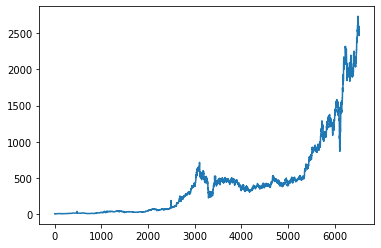

In [9]:
stock['Adj Close'].plot()

In [10]:
X=stock.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

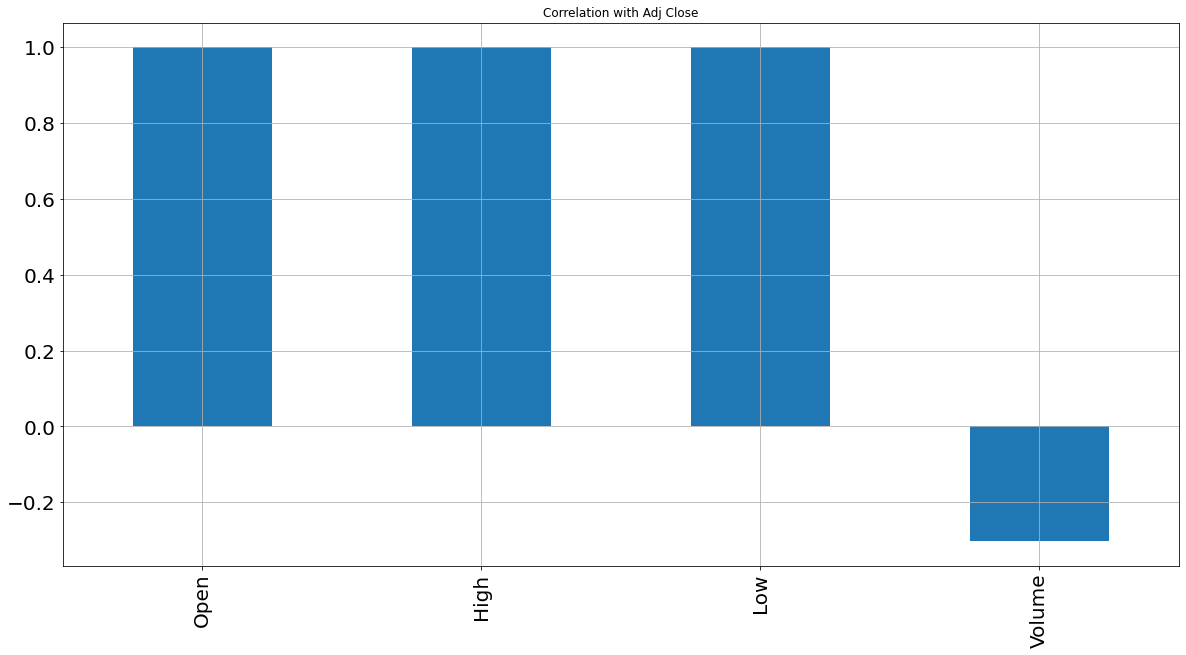

In [11]:
X.corrwith(stock['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [12]:
test = stock
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.509537,48051995.0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.427811,77875009.0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.506985,96602936.0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.409932,100099436.0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.338422,76935930.0


In [13]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
0,0.001473,0.001480,0.001481,0.071863
1,0.001480,0.001484,0.001452,0.116464
2,0.001544,0.001786,0.001526,0.144472
3,0.001438,0.001432,0.001406,0.149701
4,0.001416,0.001392,0.001394,0.115060


In [15]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
0,0.001473,0.001480,0.001481,0.071863
1,0.001480,0.001484,0.001452,0.116464
2,0.001544,0.001786,0.001526,0.144472
3,0.001438,0.001432,0.001406,0.149701
4,0.001416,0.001392,0.001394,0.115060


Shape of features :  (6522, 4)
Shape of target :  (6522, 1)


,Open,High,Low,Volume
6516,0.925776,0.933983,0.936041,0.007400
6517,0.934143,0.944296,0.943996,0.006013
6518,0.947728,0.945555,0.948818,0.003315
6519,0.937493,0.935626,0.921001,0.007825
6520,0.910726,0.907865,0.908391,0.007041


,Adj Close
6516,2593.100098
6517,2577.800049
6518,2517.899902
6519,2464.000000
6520,2473.300049



 -----After process------ 

Shape of features :  (6432, 4)
Shape of target :  (6432, 1)


,Adj Close
6427,2150.199951
6428,2124.800049
6429,2110.050049
6430,2092.600098
6431,2071.199951


In [16]:
# scaler = preprocessing.MinMaxScaler()
# scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
# stock.iloc[:,1:4] = scaled_values
#
# y_scaler = preprocessing.MinMaxScaler()
# scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
# stock.iloc[:,4] = scaled_values
#
# scaler = preprocessing.MinMaxScaler()
# scaled_values = scaler.fit_transform(stock.iloc[:,5:])
# stock.iloc[:,5:] = scaled_values
window_size = 50
week = 7
X = []
Y = []

for i in range(0 , len(stock) - window_size -1 , 1):
    first = stock.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((stock.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((stock.iloc[i +window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1,1))

In [26]:
X[0]
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [18]:
train_X,test_X,train_label,test_label = train_test_split(X, Y, test_size=0.1,shuffle=False)
len_t = len(train_X)
# train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_label, test_size=0.2,shuffle=True)

print(len(train_X))
print(len(test_X))
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
# valid_label = np.array(valid_label)
# valid_X = np.array(valid_X)
train_X = train_X.reshape(train_X.shape[0],1,50,1)
test_X = test_X.reshape(test_X.shape[0],1,50,1)

5823
648


In [19]:
model = Sequential()
#add model layers
model.add(TimeDistributed(Conv1D(128, kernel_size=1, activation='relu', input_shape=(None,50,1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(256, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(512, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.25))
# model.add(Bidirectional(LSTM(200,return_sequences=False)))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse')
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=40,batch_size=64,shuffle =False)
print(model.evaluate(test_X,test_label))
# model.summary()

Epoch 1/40
91/91 [==============================] - 4s 23ms/step - loss: 0.0118 - val_loss: 0.0041
Epoch 2/40
91/91 [==============================] - 1s 16ms/step - loss: 0.0079 - val_loss: 0.0041
Epoch 3/40
91/91 [==============================] - 2s 18ms/step - loss: 0.0074 - val_loss: 0.0040
Epoch 4/40
91/91 [==============================] - 1s 15ms/step - loss: 0.0070 - val_loss: 0.0038
Epoch 5/40
91/91 [==============================] - 1s 15ms/step - loss: 0.0068 - val_loss: 0.0035
Epoch 6/40
91/91 [==============================] - 1s 15ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 7/40
91/91 [==============================] - 1s 15ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 8/40
91/91 [==============================] - 1s 15ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 9/40
91/91 [==============================] - 1s 16ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 10/40
91/91 [==============================] - 1s 16ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 11/

In [20]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [21]:
# y_pred_test_lstm = model.predict(test_X)
# y_train_pred_lstm = model.predict(train_X)
# print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(train_label, y_train_pred_lstm)))
# r2_train = r2_score(y_train, y_train_pred_lstm)

# print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(test_label, y_pred_test_lstm)))
# r2_test = r2_score(y_test, y_pred_test_lstm)
score_lstm= model.evaluate(test_X,test_label)

21/21 [==============================] - 0s 4ms/step - loss: 0.0031


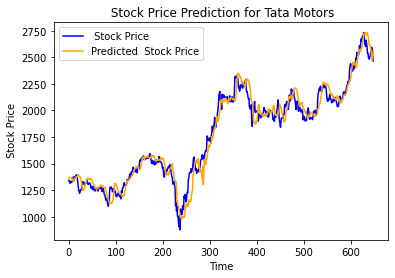

In [22]:
predicted  = model.predict(test_X)
test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(test_label, color = 'blue', label = ' Stock Price')
plt.plot(predicted, color = 'orange', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction for Tata Motors')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()
# predicted  = model.predict(test_X)
# test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
# predicted = np.array(predicted[:,0]).reshape(-1,1)
# predicted = y_scaler.inverse_transform(predicted)
# plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
# plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
# plt.title(' Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel(' Stock Price')
# plt.legend()
# plt.show()

In [23]:
col1 = pd.DataFrame(test_label, columns=['True'])

col2 = pd.DataFrame(predicted, columns=['CNN_prediction'])

# col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2], axis=1)
results.to_excel('PredictionResults_CNN.xlsx')